# Medical Insurance Cost Prediction using Linear Regression

In this notebook, I build a **linear regression** model to predict medical insurance costs (`charges`) based on personal and lifestyle features such as age, BMI, number of children, smoking status, and region.

## 1. Importing libraries

In this section, I import the Python libraries needed for:
- Data manipulation (`pandas`, `numpy`)
- Visualization (`matplotlib`, `seaborn`)
- Machine learning (`scikit-learn`)


## 2. Loading the dataset

Here I load the **insurance** dataset from a CSV file into a pandas DataFrame.

The dataset contains:
- Demographic features (age, sex, children)
- Health-related features (BMI, smoker)
- Location (region)
- Target variable: `charges` (medical insurance cost)


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [3]:
data=pd.read_csv('insurance.csv')

## 3. Initial data exploration

In this step, I perform a quick **Exploratory Data Analysis (EDA)** to understand the structure of the dataset:

- `head()` to preview the first rows
- `info()` to inspect data types and missing values
- `describe()` to look at basic statistics of numerical features

This helps identify potential data quality issues and understand the scale of each variable.[web:40]


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 4. Visualizing feature distributions

Here I visualize the distributions of key features such as:
- `age`
- `bmi`
- `children`
- `charges`

The goal is to:
- Detect skewness and outliers
- Get an intuition about how the target variable (`charges`) is spread across the population.[web:47]


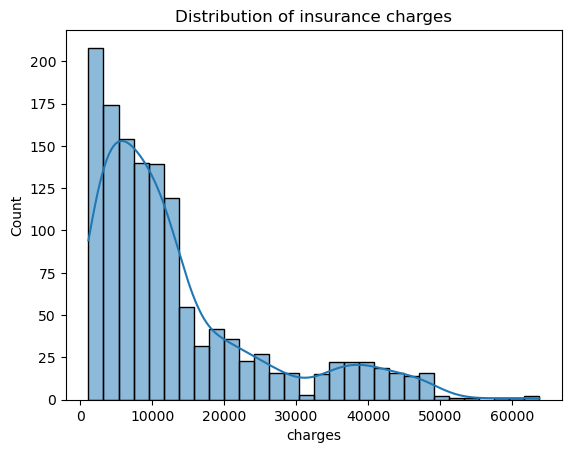

In [9]:
sns.histplot(data["charges"], kde=True)
plt.title("Distribution of insurance charges")
plt.show()




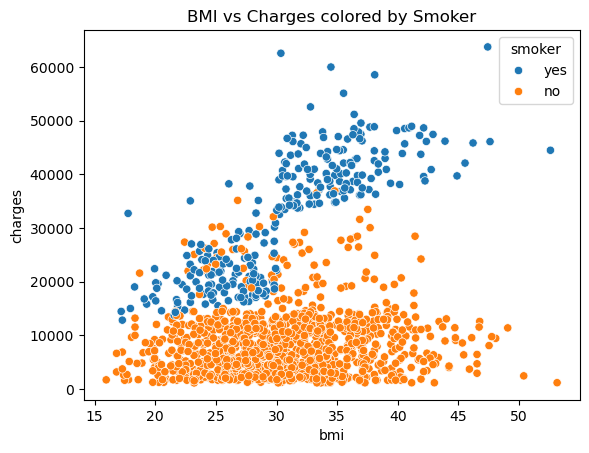

In [10]:
sns.scatterplot(data=data, x="bmi", y="charges", hue="smoker")
plt.title("BMI vs Charges colored by Smoker")
plt.show()


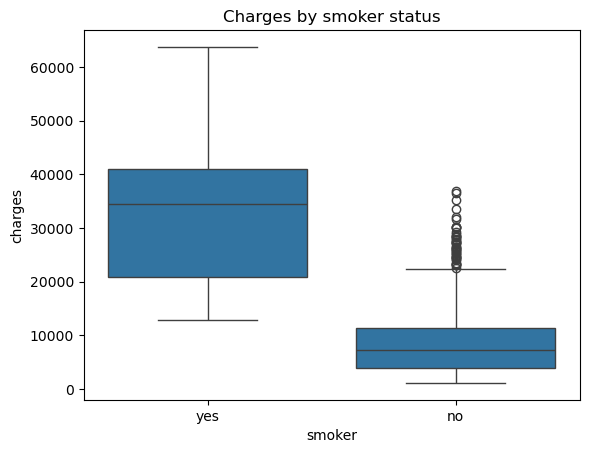

In [11]:
sns.boxplot(data=data, x="smoker", y="charges")
plt.title("Charges by smoker status")
plt.show()


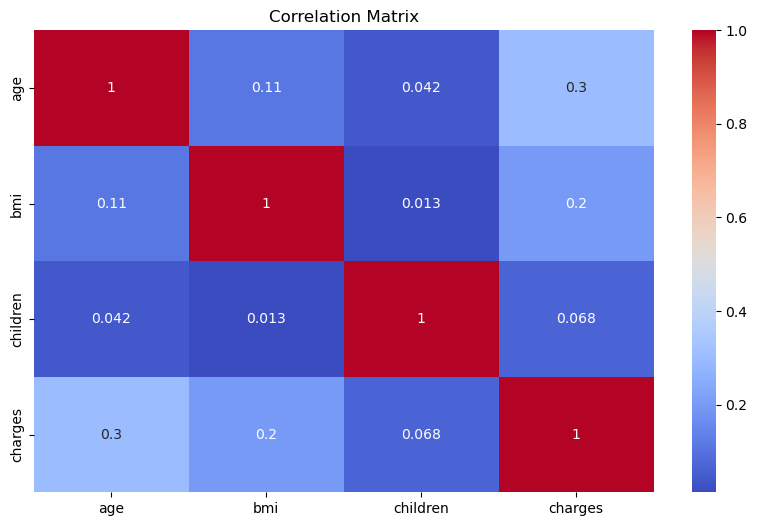

In [13]:
num_cols = data.select_dtypes(include='number')

plt.figure(figsize=(10,6))
sns.heatmap(num_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


## 6. Encoding categorical variables

The dataset includes several **categorical** features:

- `sex` (male / female)
- `smoker` (yes / no)
- `region` (northeast, northwest, southeast, southwest)

In this step, I convert them into numerical representations:

- Binary mapping for `sex` and `smoker`
- One-hot encoding for `region`

This encoding is required to use these variables in a linear regression model.[web:40][web:42]


In [12]:
data_encoded = data.copy()

# Binary encoding for sex and smoker
data_encoded["sex"] = data_encoded["sex"].map({"female": 0, "male": 1})
data_encoded["smoker"] = data_encoded["smoker"].map({"no": 0, "yes": 1})

# One-hot encode region (drop_first to avoid dummy trap)
data_encoded = pd.get_dummies(data_encoded, columns=["region"], drop_first=True)

data_encoded.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,False,False,True
1,18,1,33.770,1,0,1725.55230,False,True,False
2,28,1,33.000,3,0,4449.46200,False,True,False
3,33,1,22.705,0,0,21984.47061,True,False,False
4,32,1,28.880,0,0,3866.85520,True,False,False


## 7. Defining features and target

Here I separate the dataset into:

- **Target (`y`)**: `charges` (medical insurance cost)
- **Features (`X`)**: all remaining columns after encoding (`age`, `sex`, `bmi`, `children`, `smoker`, and region dummy variables)

This prepares the data for model training.[web:42]


In [14]:
target_col = "charges"

feature_cols = [col for col in data_encoded.columns if col != target_col]

X = data_encoded[feature_cols]
y = data_encoded[target_col]


In [22]:


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error, r2_score


## 8. Train–test split

To evaluate the model fairly, I split the data into:

- **Training set**: used to fit the linear regression model
- **Test set**: used to assess how well the model generalizes to unseen data

I use an 80/20 split and a fixed `random_state` for reproducibility.[web:47]


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


## 9. Training the Linear Regression model

In this step, I train a **LinearRegression** model (from `scikit-learn`) on the training data.

The model learns a linear relationship of the form:

\[
\text{charges} = \beta_0 + \beta_1 \cdot \text{age} + \beta_2 \cdot \text{bmi} + \dots
\]

where the coefficients \(\beta_i\) represent the contribution of each feature.[web:23][web:42]


In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## 10. Model evaluation (R² and RMSE)

After training the model, I evaluate its performance on the **test set** using:

- **R² (coefficient of determination)**: measures how much of the variance in `charges` is explained by the model.
- **RMSE (Root Mean Squared Error)**: measures the average prediction error in the same units as `charges`.

Higher R² and lower RMSE indicate a better fit on the test data.[web:47][web:54]


In [18]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R²:", r2)
print("RMSE:", rmse)


R²: 0.7835929767120723
RMSE: 5796.2846592762735


## 13. Interpreting model coefficients

Here I inspect the learned coefficients for each feature:

- Positive coefficients indicate that increasing the feature increases the predicted `charges`, holding other variables constant.
- Negative coefficients indicate the opposite.

This step provides interpretability and helps understand which factors drive insurance costs the most (for example, `smoker` typically has a strong positive effect).[web:41][web:47]


In [19]:
coef_df = pd.DataFrame({
    "feature": feature_cols,
    "coefficient": model.coef_
}).sort_values(by="coefficient", key=abs, ascending=False)

print(coef_df)


            feature   coefficient
4            smoker  23651.128856
7  region_southwest   -809.799354
6  region_southeast   -657.864297
3          children    425.278784
5  region_northwest   -370.677326
2               bmi    337.092552
0               age    256.975706
1               sex    -18.591692


## 11. Visualizing actual vs predicted charges

In this section, I plot **actual** vs **predicted** insurance charges:

- Each point represents one observation from the test set.
- The dashed red line corresponds to **perfect predictions** (`y = x`).

If the model performs well, most points should lie close to the red line.[web:53][web:57]


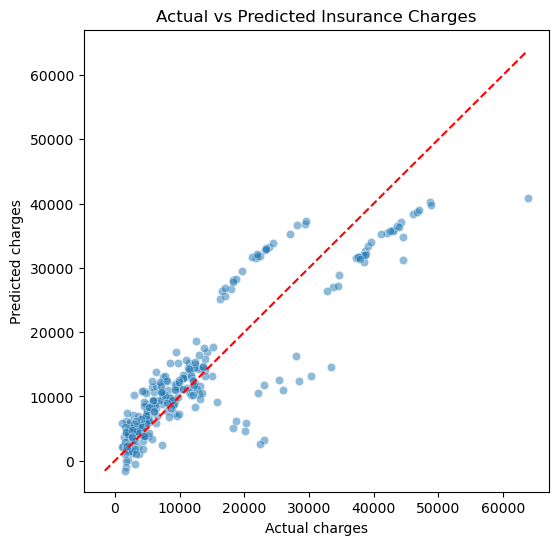

In [20]:

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Actual vs Predicted Insurance Charges")

# perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--")

plt.show()


In [23]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2 Score): {r2:.4f}")

Mean Absolute Error (MAE): 4181.19
R-squared (R2 Score): 0.7836


In [24]:
print("-" * 30)
print(f"📊 Model Performance Metrics:")
print("-" * 30)
print(f"MAE:  ${mae:,.2f}")
print(f"R2:   {r2:.2%}")
print("-" * 30)

------------------------------
📊 Model Performance Metrics:
------------------------------
MAE:  $4,181.19
R2:   78.36%
------------------------------
